<a href="https://www.kaggle.com/code/mohammadamintaheri/titanic-passengers-survival-prediction?scriptVersionId=101817519" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Packages

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
import random as rn
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.model_selection import ShuffleSplit, cross_validate, learning_curve, validation_curve
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer, Real

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Options

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', True)

sns.set_palette('Set1')
sns.set_style("white")

# Acquiring Data

In [3]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

# Analysis

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()
print('-' * 50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [7]:
print('Train Columns with Null Values:\n', train_df.isnull().sum())
print('-' * 50)
print('Test Columns with Null Values:\n', test_df.isnull().sum())
print('-' * 50)

percentiles = np.arange(0, 1, 0.05, dtype='float')
train_df.describe(percentiles=list(percentiles.round(2)), include='all')

Train Columns with Null Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
Test Columns with Null Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
0%,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
5%,45.500000,0.000000,1.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN,7.225000,NaN,NaN
10%,90.000000,0.000000,1.000000,NaN,NaN,14.000000,0.000000,0.000000,NaN,7.550000,NaN,NaN


In [8]:
print('Training dataset has {} duplicated records'.format(train_df.duplicated().sum()))
print('Test dataset has {} duplicated records'.format(test_df.duplicated().sum()))      

Training dataset has 0 duplicated records
Test dataset has 0 duplicated records


In [9]:
# Correlation Checking
print(train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Pclass', ascending=True))
print('-' * 50)
print(train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Sex', ascending=True))
print('-' * 50)
print(train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='SibSp', ascending=True))
print('-' * 50)
print(train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Parch', ascending=True))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------------------------------------
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------------------------------------
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


# Visualizations

In [10]:
def plot_num_dist(df, x=None, y=None):
    fig, axis = plt.subplots(1, 2, figsize=(16, 5))
    sns.histplot(data=df, x=x, y=y, kde=True, ax=axis[0])
    sns.boxplot(data=df, y=x, x=y, ax=axis[1])
    
def plot_cat_dist(df, var):
    fig, axis = plt.subplots(1, 2, figsize=(16, 5))
    df[var].value_counts().plot(kind="pie", explode=[0.05 for x in df[var].dropna().unique()], autopct='%1.1f%%', shadow=True, ax=axis[0])
    count = sns.countplot(data=df, x=var, ax=axis[1])
    for bar in count.patches:
        count.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=11, xytext=(0, 8),
            textcoords='offset points')

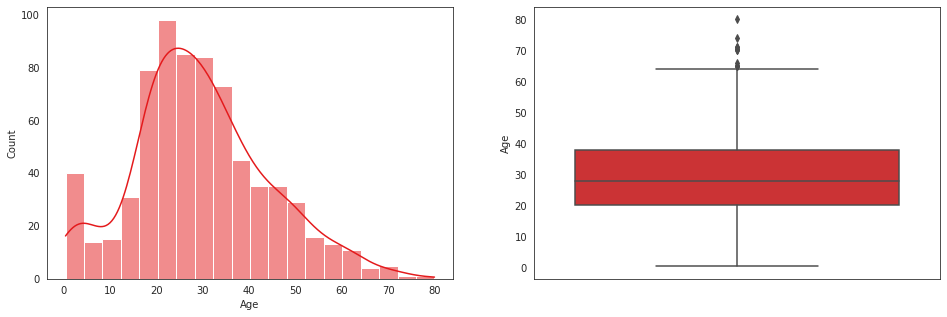

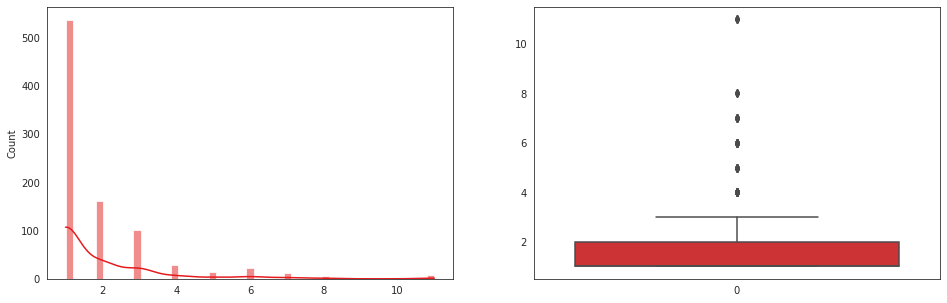

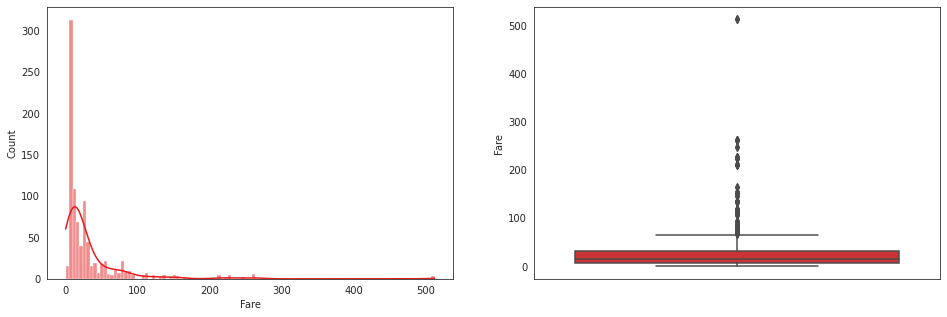

In [11]:
plot_num_dist(train_df, 'Age')
plot_num_dist(train_df['Parch'] + train_df['SibSp'] + 1)
plot_num_dist(train_df, 'Fare')

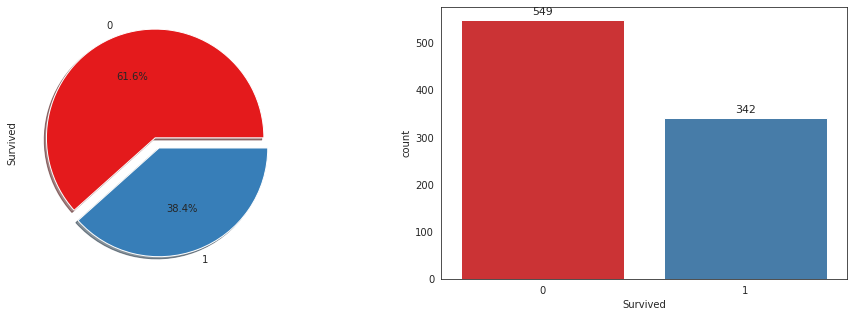

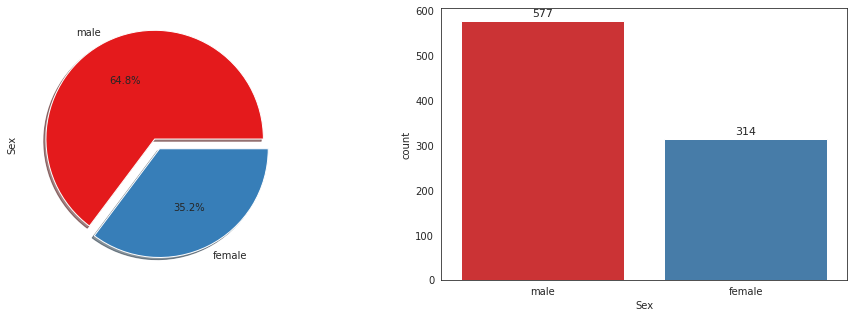

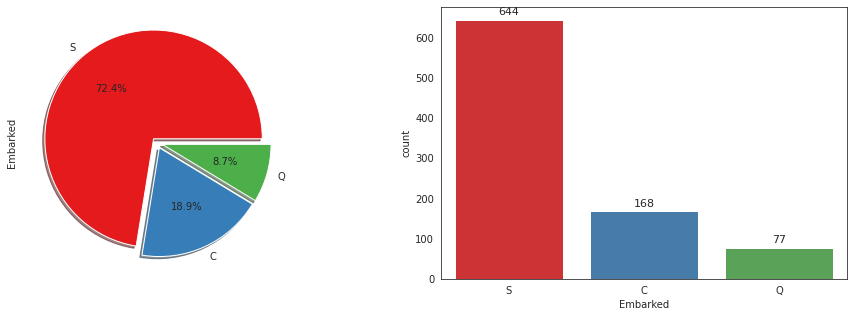

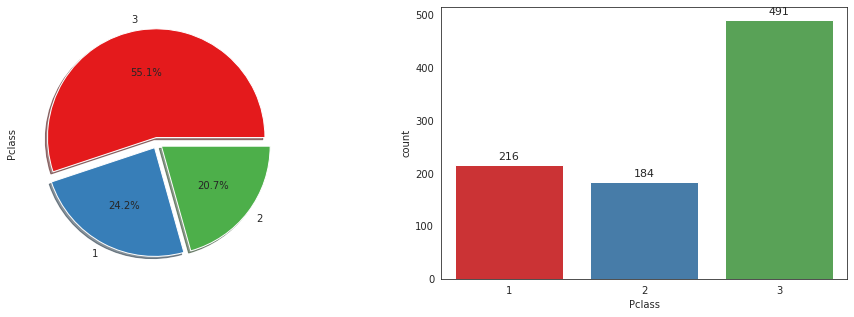

In [12]:
for cat_var in ["Survived", "Sex", "Embarked", "Pclass"]:
    plot_cat_dist(train_df, cat_var)

<AxesSubplot:ylabel='Fare'>

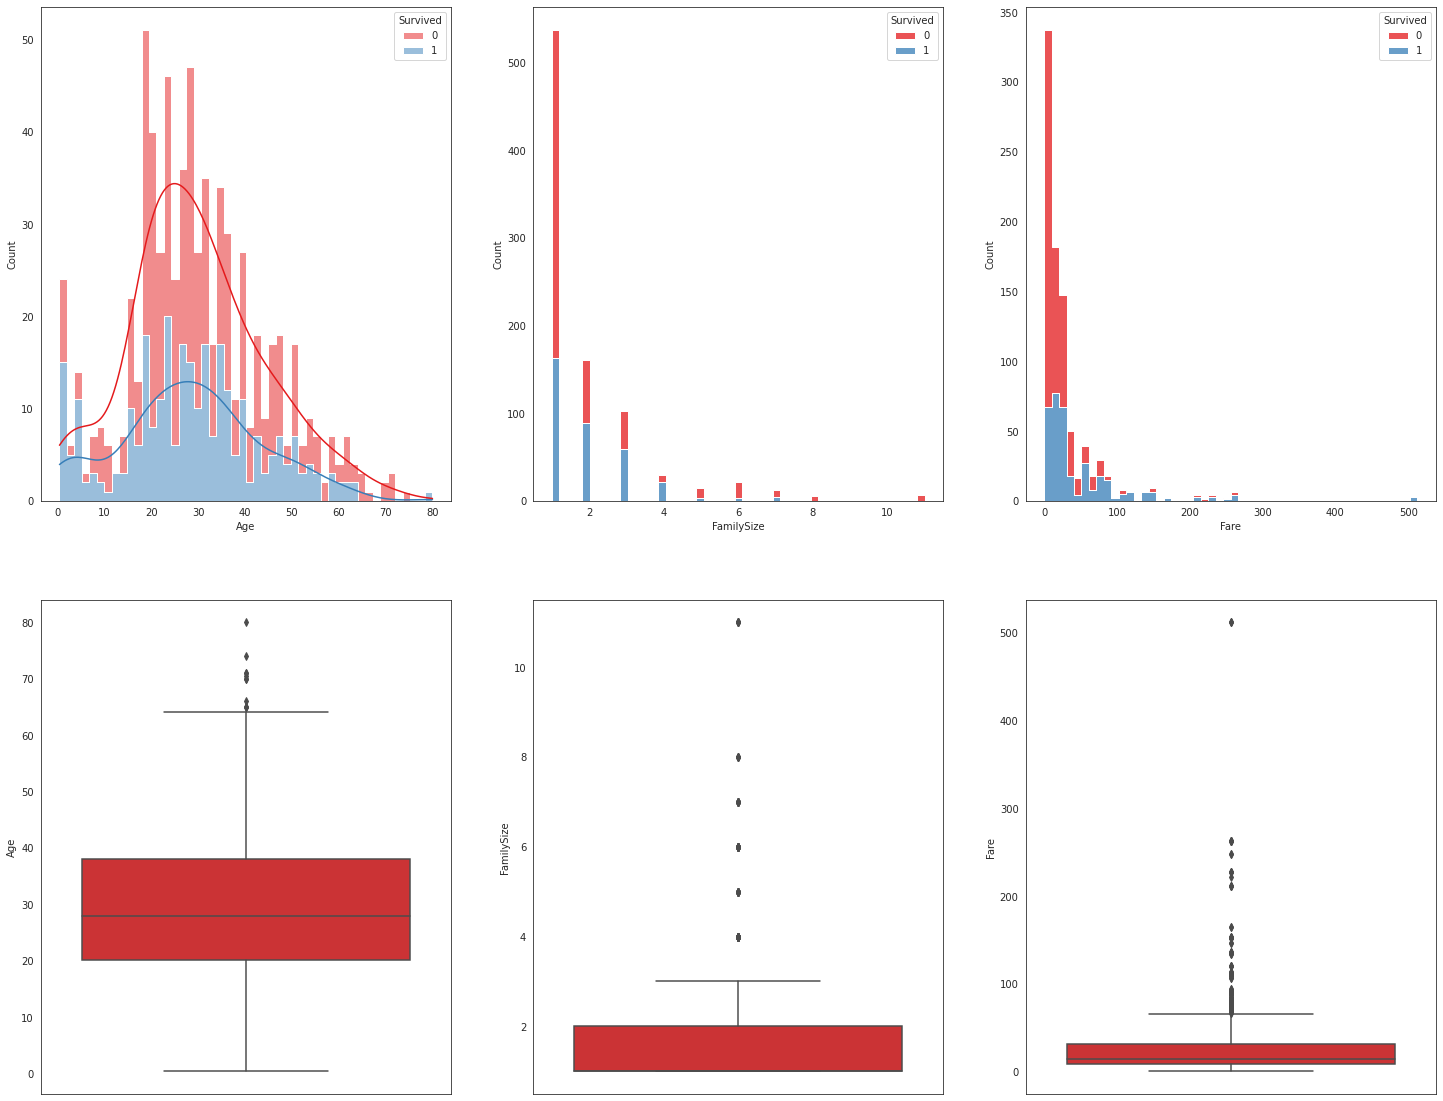

In [13]:
fig, axis = plt.subplots(2, 3, figsize=(25, 20))
sns.histplot(data=train_df, x='Age', hue='Survived', bins=50, multiple='stack', element='step', kde=True, ax=axis[0, 0])
p = sns.histplot(data=train_df, x=(train_df['Parch'] + train_df['SibSp'] + 1), hue='Survived', multiple='stack', element='step', ax=axis[0, 1])
p.set_xlabel('FamilySize')
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=50, multiple='stack', element='step', ax=axis[0, 2])

sns.boxplot(data=train_df, y='Age', hue='Survived', ax=axis[1, 0])
p = sns.boxplot(data=train_df, y=(train_df['Parch'] + train_df['SibSp'] + 1), hue='Survived', ax=axis[1, 1])
p.set_ylabel('FamilySize')
sns.boxplot(data=train_df, y='Fare', hue='Survived', ax=axis[1, 2])

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

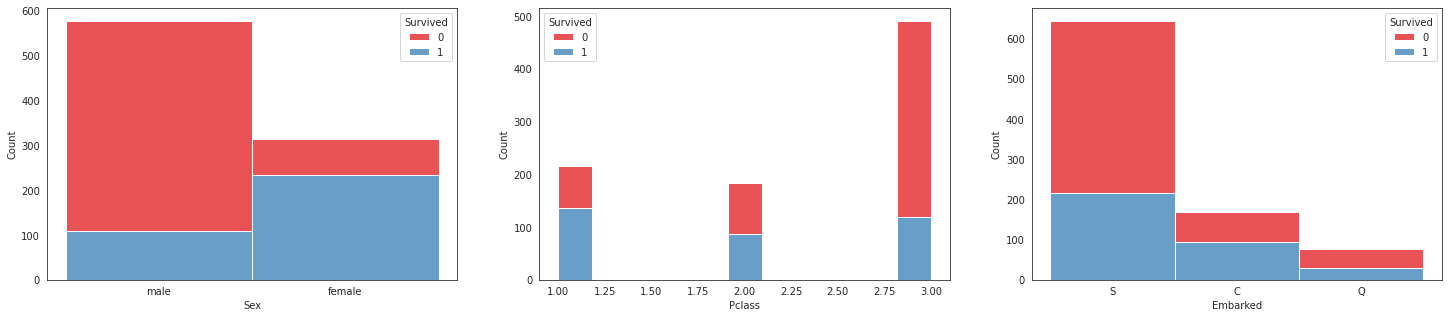

In [14]:
fig, axis = plt.subplots(1, 3, figsize=(25, 5))
sns.histplot(data=train_df, x='Sex', hue='Survived', multiple='stack', ax=axis[0])
sns.histplot(data=train_df, x='Pclass', hue='Survived', multiple='stack', ax=axis[1])
sns.histplot(data=train_df, x='Embarked', hue='Survived', multiple='stack', ax=axis[2])

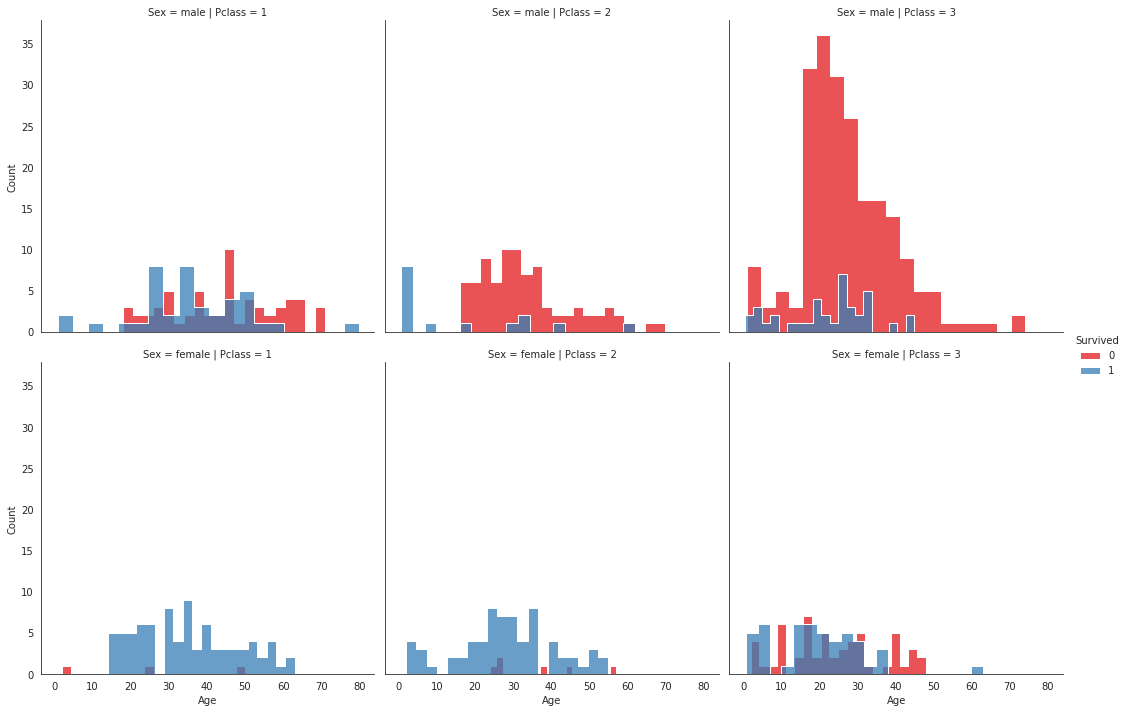

In [15]:
grid = sns.FacetGrid(train_df, row='Sex', col='Pclass', height=5, hue='Survived')
grid.map(sns.histplot, 'Age', bins=20, multiple='stack', element='step')
grid.add_legend()

Text(0, 0.5, 'FamilySize')

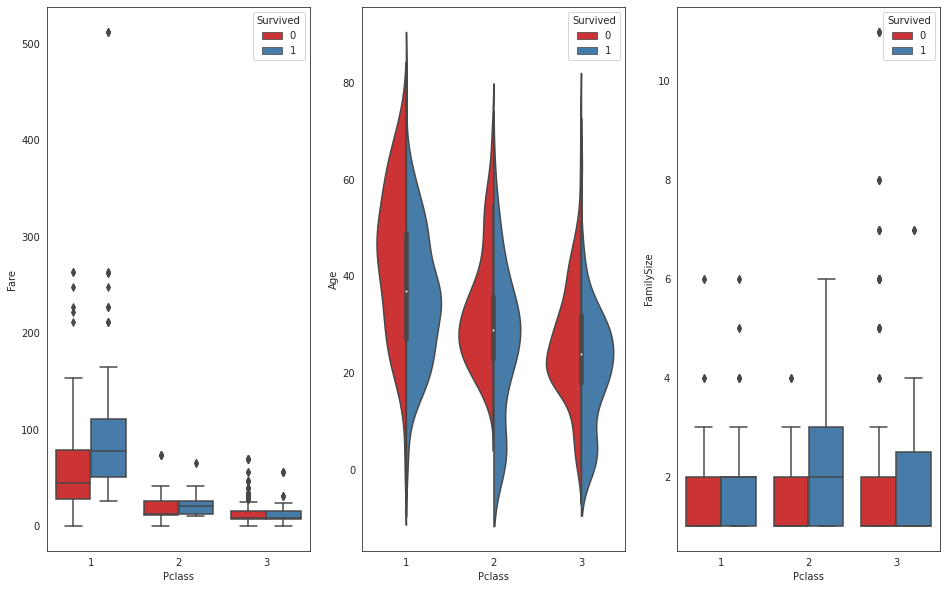

In [16]:
fig, axis = plt.subplots(1, 3, figsize=(16, 10))

sns.boxplot(data=train_df, x='Pclass', y='Fare', hue='Survived', ax=axis[0])
sns.violinplot(data=train_df, x='Pclass', y='Age', hue='Survived', split=True, ax=axis[1])
p = sns.boxplot(data=train_df, x='Pclass', y=(train_df['Parch'] + train_df['SibSp'] + 1), hue='Survived', ax=axis[2])
p.set_ylabel('FamilySize')

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

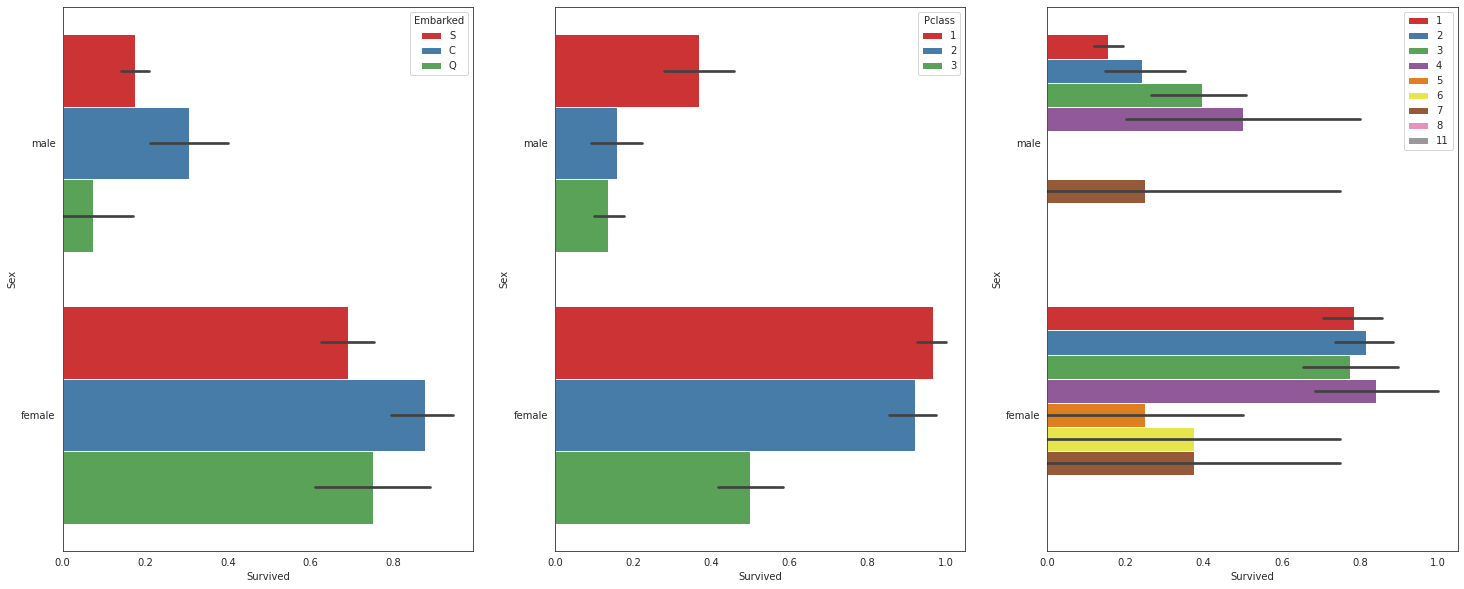

In [17]:
fig, axis = plt.subplots(1, 3, figsize=(25, 10))

sns.barplot(data=train_df, y='Sex', x='Survived', hue='Embarked', ax=axis[0])
sns.barplot(data=train_df, y='Sex', x='Survived', hue='Pclass', ax=axis[1])
sns.barplot(data=train_df, y='Sex', x='Survived', hue=(train_df['Parch'] + train_df['SibSp'] + 1), ax=axis[2])

<AxesSubplot:ylabel='Survived'>

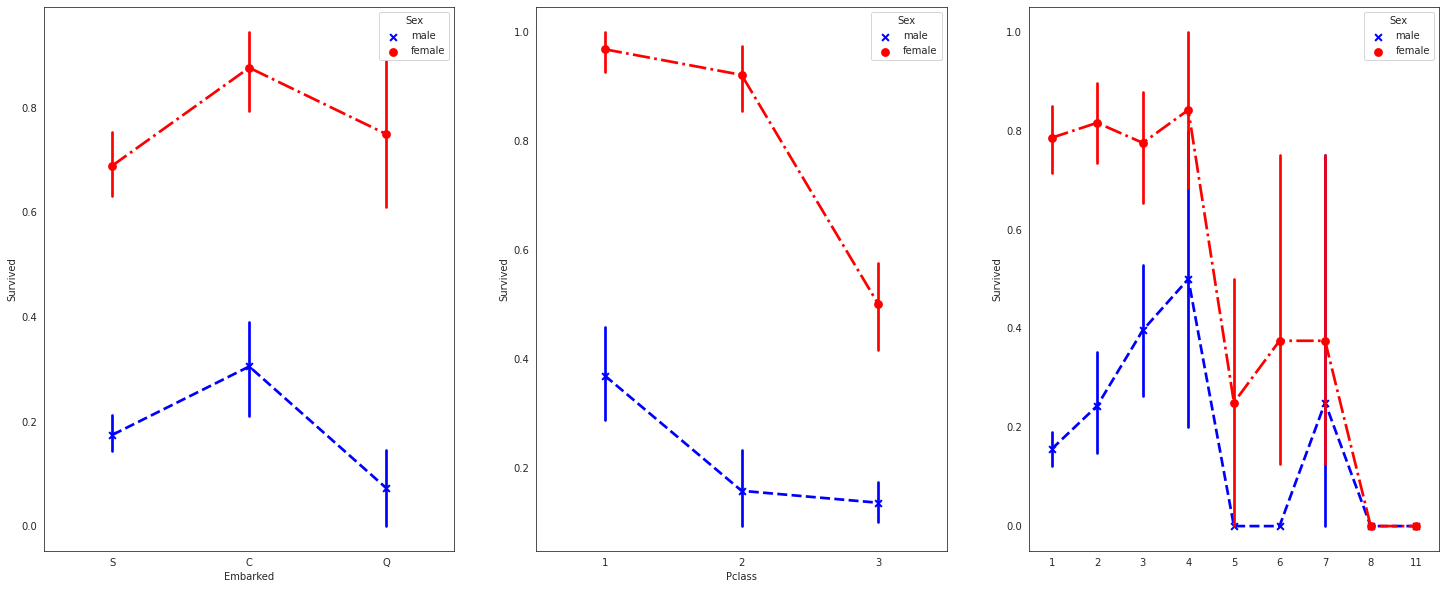

In [18]:
fig, axis = plt.subplots(1, 3, figsize=(25, 10))

sns.pointplot(data=train_df, x='Embarked', y='Survived', hue='Sex', palette={'male': 'blue', 'female': 'red'}, markers=['x', 'o'],
              linestyles=['--', '-.'], ax=axis[0])
sns.pointplot(data=train_df, x='Pclass', y='Survived', hue='Sex', palette={'male': 'blue', 'female': 'red'}, markers=['x', 'o'],
              linestyles=['--', '-.'], ax=axis[1])
sns.pointplot(data=train_df, x=(train_df['Parch'] + train_df['SibSp'] + 1), y='Survived', hue='Sex', palette={'male': 'blue', 'female': 'red'}, markers=['x', 'o'],
              linestyles=['--', '-.'], ax=axis[2])

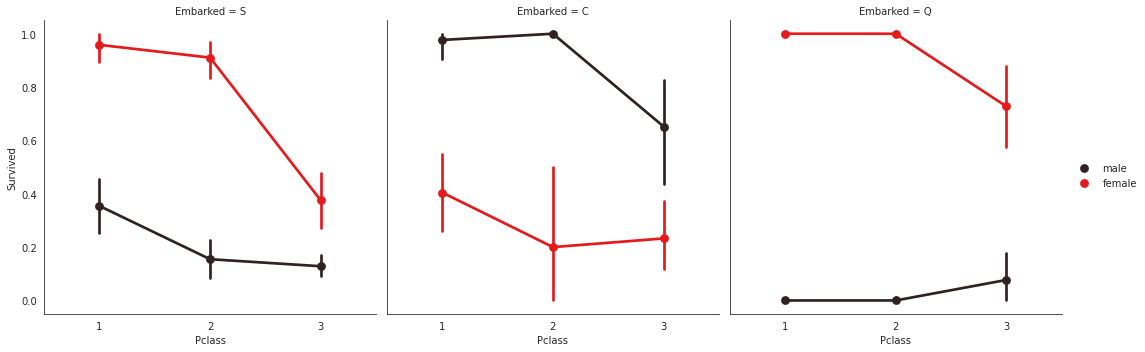

In [19]:
grid = sns.FacetGrid(data=train_df, col='Embarked', height=5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

In [20]:
train_df.loc[train_df['Embarked'] == 'C'][['Survived', 'Sex', 'Pclass']].groupby(['Sex', 'Pclass']).mean()

# It seems that in the above figure, the middle plot has matched the Sex column to the hue parameter incorrectly

Survived
Sex    Pclass          
female 1       0.976744
       2       1.000000
       3       0.652174
male   1       0.404762
       2       0.200000
       3       0.232558

# Wrangling Data

In [21]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for df in [train_df, test_df]:
    df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Dona'], 'Misc', inplace=True)
    df['Title'].replace('Ms', 'Miss', inplace=True)
    df['Title'].replace('Mlle', 'Miss', inplace=True)
    df['Title'].replace('Mme', 'Mrs', inplace=True)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Misc,3,20
Miss,185,0
Mr,0,517
Mrs,126,0


In [23]:
train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
4,Mrs,0.793651
2,Miss,0.702703
0,Master,0.575000
1,Misc,0.347826
3,Mr,0.156673


In [24]:
null_num_cols = ['Age', 'Fare']
num_imputer = KNNImputer()

tmp_tr_df = pd.DataFrame(num_imputer.fit_transform(train_df[null_num_cols]))
tmp_tr_df.columns = null_num_cols
train_df[null_num_cols] = tmp_tr_df[null_num_cols]

tmp_te_df = pd.DataFrame(num_imputer.transform(test_df[null_num_cols]))
tmp_te_df.columns = null_num_cols
test_df[null_num_cols] = tmp_te_df[null_num_cols]


emb_imputer = SimpleImputer(strategy='most_frequent')

tmp_tr_df = pd.DataFrame(emb_imputer.fit_transform(train_df[['Embarked']]))
tmp_tr_df.columns = ['Embarked']
train_df[['Embarked']] = tmp_tr_df[['Embarked']]


print('Train Columns with Null Values:\n', train_df.isnull().sum())
print('-' * 50)
print('Test Columns with Null Values:\n', test_df.isnull().sum())

Train Columns with Null Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64
--------------------------------------------------
Test Columns with Null Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


In [25]:
age_bands = pd.cut(train_df['Age'], 10)
result = age_bands.to_frame().join(train_df['Survived'], how='inner').groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(result)

                Age  Survived
0     (0.34, 8.378]  0.666667
9    (72.042, 80.0]  0.500000
6  (48.168, 56.126]  0.479167
1   (8.378, 16.336]  0.395833
4   (32.252, 40.21]  0.377358
7  (56.126, 64.084]  0.375000
2  (16.336, 24.294]  0.362245
5   (40.21, 48.168]  0.354430
3  (24.294, 32.252]  0.349265
8  (64.084, 72.042]  0.000000


In [26]:
fare_bands = pd.cut(train_df['Fare'], 4)
result = fare_bands.to_frame().join(train_df['Survived'], how='inner').groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(result)

                 Fare  Survived
3  (384.247, 512.329]  1.000000
1  (128.082, 256.165]  0.724138
2  (256.165, 384.247]  0.666667
0   (-0.512, 128.082]  0.368113


In [27]:
# Cannot use ordinal encoder to directly encode age_bands and fare_babnds; because transforming the test dataset, firstly needs this data to be cut into bins 
# which pattern should learned by the training dataset; not possible.

for df in [train_df, test_df]:
    df['Age'] = pd.cut(df['Age'], bins=[i for i in range(0, 81, 8)], labels=[i for i in range(0, 10)])
    df['Fare'] = pd.cut(df['Fare'], bins=[i for i in range(-1, 640, 128)], labels=[i for i in range(0, 5)])

In [28]:
train_df['FamilyOnboard'] = train_df['Parch'] + train_df['SibSp'] + 1
test_df['FamilyOnboard'] = test_df['Parch'] + test_df['SibSp'] + 1

print(train_df[['FamilyOnboard', 'Survived']].groupby(['FamilyOnboard'], as_index=False).mean().sort_values(by='Survived', ascending=False))

train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['FamilyOnboard'] > 1] = 0
test_df['IsAlone'] = 1
test_df['IsAlone'].loc[test_df['FamilyOnboard'] > 1] = 0

print(train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilyOnboard  Survived
3              4  0.724138
2              3  0.578431
1              2  0.552795
6              7  0.333333
0              1  0.303538
4              5  0.200000
5              6  0.136364
7              8  0.000000
8             11  0.000000
   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [29]:
for df in [train_df, test_df]:
    for categorical in ['Sex', 'Embarked', 'Title']:
        df[categorical] = pd.Categorical(df[categorical])
    for ordinal in ['Age', 'Fare', 'Pclass']:
        df[ordinal] = df[ordinal].astype('int')

train_df.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex              category
Age                 int64
SibSp               int64
Parch               int64
Ticket             object
Fare                int64
Cabin              object
Embarked         category
Title            category
FamilyOnboard       int64
IsAlone             int64
dtype: object

# Dropping Unnecessary Columns

In [30]:
train_df.drop(['PassengerId', 'Cabin', 'Ticket', 'Name', 'Parch', 'SibSp'], axis=1, inplace=True)
test_df.drop(['Cabin', 'Ticket', 'Name', 'Parch', 'SibSp'], axis=1, inplace=True)

print(' train_df shape: {} \n test_df shape: {}'.format(train_df.shape, test_df.shape))

 train_df shape: (891, 9) 
 test_df shape: (418, 9)


# Further Analysis

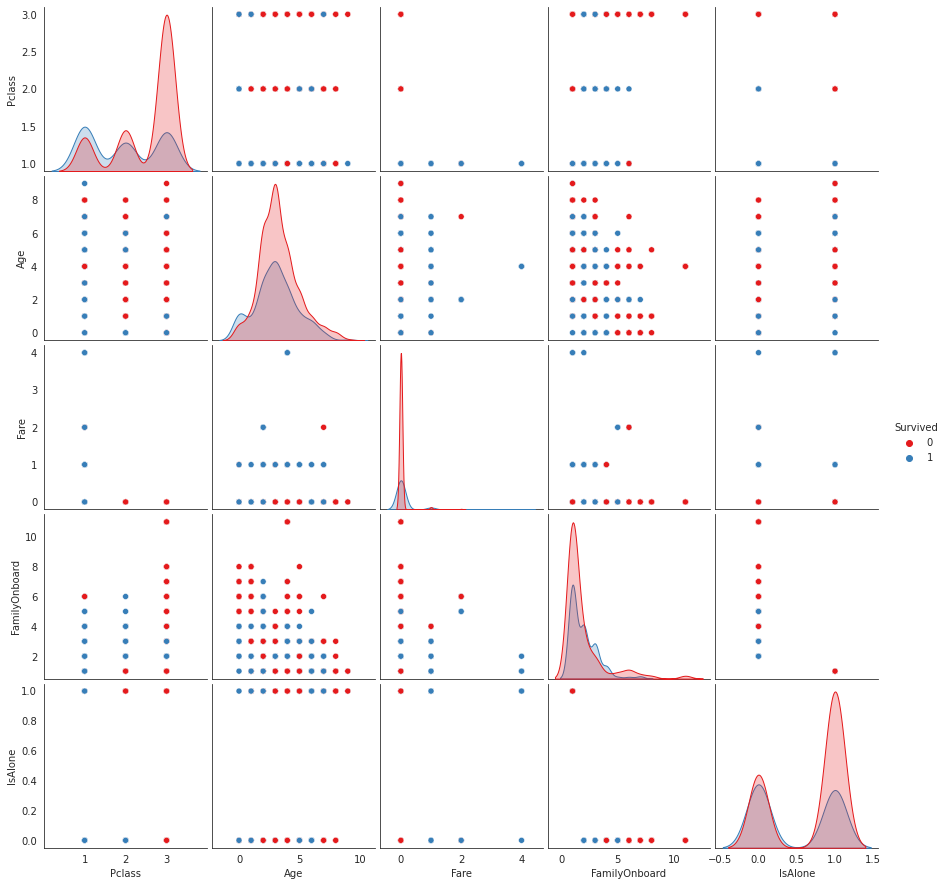

In [31]:
sns.pairplot(data=train_df, hue='Survived')

<AxesSubplot:>

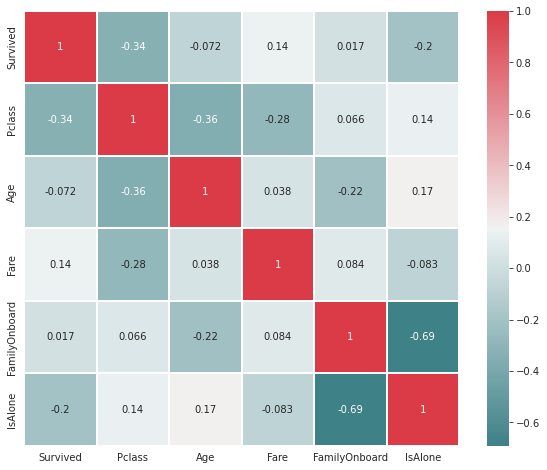

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), cmap=sns.diverging_palette(200, 10, as_cmap=True), square=True, annot=True, linewidths=0.1, linecolor='white')

# One-Hot Encoding Categorical Features

In [33]:
# We drop the first category to avoid multicollinearity.

oh_train_df = pd.get_dummies(train_df, drop_first=True)
oh_test_df = pd.get_dummies(test_df, drop_first=True)

oh_train_df.sample(10)
# oh_test_df.sample(10)

,Survived,Pclass,Age,Fare,FamilyOnboard,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
555,0,1,7,0,1,1,1,0,1,0,0,1,0
6,0,1,6,0,1,1,1,0,1,0,0,1,0
510,1,3,3,0,1,1,1,1,0,0,0,1,0
875,1,3,1,0,1,1,0,0,0,0,1,0,0
111,0,3,1,0,2,0,0,0,0,0,1,0,0
714,0,2,6,0,1,1,1,0,1,0,0,1,0
611,0,3,3,0,1,1,1,0,1,0,0,1,0
505,0,1,2,0,2,0,1,0,0,0,0,1,0
410,0,3,3,0,1,1,1,0,1,0,0,1,0
576,1,2,4,0,1,1,0,0,1,0,1,0,0


<AxesSubplot:xlabel='MI Scores'>

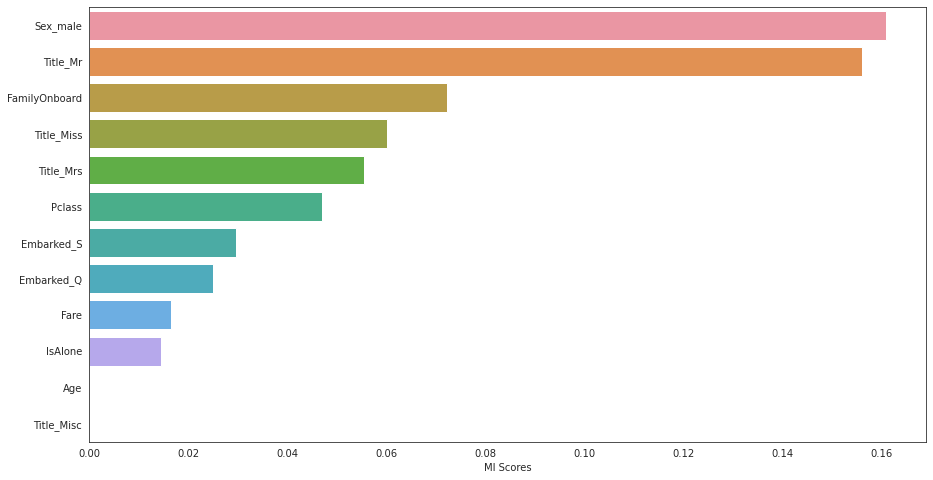

In [34]:
mi_scores = pd.Series(mutual_info_classif(X=oh_train_df.drop('Survived', axis=1), y=oh_train_df.loc[:,'Survived'], discrete_features='auto'),
                      name='MI Scores', index=oh_train_df.drop('Survived', axis=1).columns).sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=mi_scores, y=mi_scores.index)

# Evaluating Different Models

In [35]:
X = oh_train_df.drop('Survived', axis=1)
y = oh_train_df.loc[:,'Survived']

X_test = oh_test_df.drop('PassengerId', axis=1)

In [36]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [37]:
# This'll be used for correlation heatmap generation

predictions = pd.DataFrame(oh_train_df['Survived'])

In [38]:
Models = [LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier, RidgeClassifier, SVC, NuSVC, LinearSVC, RandomForestClassifier,
          AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, GaussianProcessClassifier, KNeighborsClassifier,
          BernoulliNB, GaussianNB, DecisionTreeClassifier, ExtraTreeClassifier, XGBClassifier]

cv_split = ShuffleSplit(n_splits=10, train_size=0.8, random_state=0)

models_overview = pd.DataFrame()

row_index = 0
for Model in Models:
    try:
        model = Model(random_state=0)
    except TypeError:
        model = Model()
    
    cv_results = cross_validate(model, X, y, scoring='accuracy', cv=cv_split, n_jobs=-1)
    cv_results_scaled = cross_validate(model, X_scaled, y, scoring='accuracy', cv=cv_split, n_jobs=-1)
    name = Model().__class__.__name__
    
    models_overview.loc[row_index, 'Model'] = name
    models_overview.loc[row_index, 'Raw Accuracy'] = cv_results['test_score'].mean()
    models_overview.loc[row_index, 'Scaled Accuracy'] = cv_results_scaled['test_score'].mean()
    
    row_index += 1
    
    model.fit(X, y)
    predictions[name] = model.predict(X)

In [39]:
models_overview['MAX Accuracy'] = models_overview[['Raw Accuracy', 'Scaled Accuracy']].max(axis=1)
models_overview.sort_values(by='MAX Accuracy', ascending=False)

,Model,Raw Accuracy,Scaled Accuracy,MAX Accuracy
5,SVC,0.827933,0.835754,0.835754
0,LogisticRegression,0.823464,0.832402,0.832402
7,LinearSVC,0.830726,0.831844,0.831844
4,RidgeClassifier,0.831844,0.831844,0.831844
13,GaussianProcessClassifier,0.830168,0.830726,0.830726
6,NuSVC,0.829050,0.828492,0.829050
10,GradientBoostingClassifier,0.827933,0.827933,0.827933
14,KNeighborsClassifier,0.817318,0.827374,0.827374
19,XGBClassifier,0.823464,0.823464,0.823464
9,AdaBoostClassifier,0.818994,0.818994,0.818994


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'SGDClassifier'),
  Text(2, 0, 'Perceptron'),
  Text(3, 0, 'PassiveAggressiveClassifier'),
  Text(4, 0, 'RidgeClassifier'),
  Text(5, 0, 'SVC'),
  Text(6, 0, 'NuSVC'),
  Text(7, 0, 'LinearSVC'),
  Text(8, 0, 'RandomForestClassifier'),
  Text(9, 0, 'AdaBoostClassifier'),
  Text(10, 0, 'GradientBoostingClassifier'),
  Text(11, 0, 'BaggingClassifier'),
  Text(12, 0, 'ExtraTreesClassifier'),
  Text(13, 0, 'GaussianProcessClassifier'),
  Text(14, 0, 'KNeighborsClassifier'),
  Text(15, 0, 'BernoulliNB'),
  Text(16, 0, 'GaussianNB'),
  Text(17, 0, 'DecisionTreeClassifier'),
  Text(18, 0, 'ExtraTreeClassifier'),
  Text(19, 0, 'XGBClassifier')])

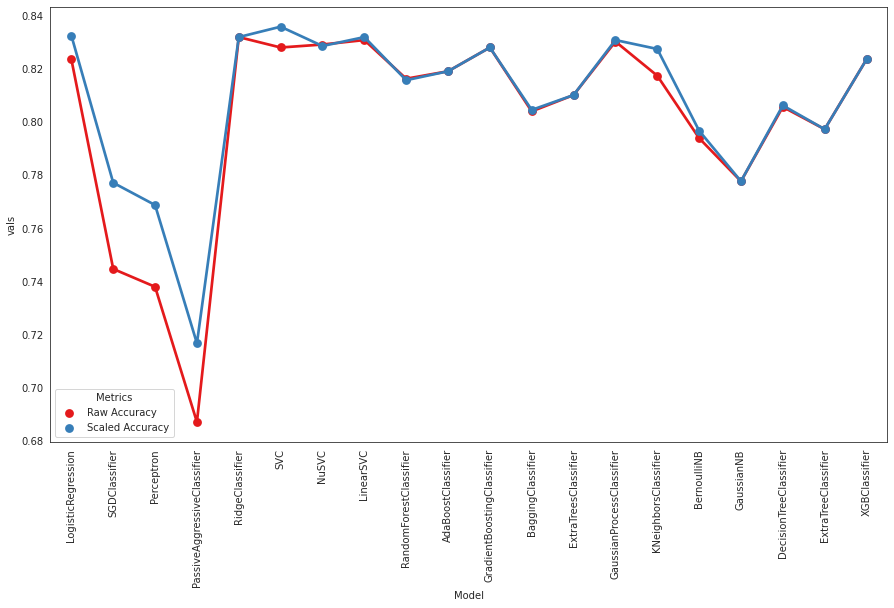

In [40]:
plt.figure(figsize=(15, 8))
sns.pointplot(x='Model', y='vals', hue='Metrics', data=models_overview.drop('MAX Accuracy', axis=1).melt('Model', var_name='Metrics', value_name='vals'))
plt.xticks(rotation=90)

# Hyperparameter Tuning

In [41]:
# We only tune hyperparameters associated with the SVC Model.
# Running this cell is very computational intensive and time consuming.

# opt_svc = BayesSearchCV(SVC(random_state=0),
#                         {'C': Real(2e-5, 2e10, prior='log-uniform'),
#                          'gamma': Real(2e-5, 2e10, prior='log-uniform'),
#                          'degree': Integer(1, 8, prior='uniform'),
#                          'kernel': Categorical(['linear', 'poly', 'rbf'])},
#                         n_iter=35, scoring='accuracy', cv=cv_split, verbose=4, random_state=0, n_jobs=-1)
# opt_svc.fit(X, y)
# print(f'SVM Validation Score: {opt_svc.best_score_}')

In [42]:
# Plotting validation curves are way faster than tuning hyperparameters using GridSearch, RandomizedSearch, or BayesSearch.

def plot_validation_curve(estimator, title, X, y, param_name, param_range, n_jobs=-1, cv=None, xscale=None):
    fig, axis = plt.subplots()
    train_scores, test_scores = validation_curve(estimator=estimator, X=X, y=y, param_name=param_name, param_range=param_range, cv=cv, n_jobs=n_jobs)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.title(title)
    if xscale is not None:
        plt.xscale(xscale)
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    axis.set_yticks(np.arange(0.5, 1.01, 0.05))
    print('Max Train Score: %.2f \t Max Test Score: %.2f' %(train_mean.max(), test_mean.max()))
    plt.show()

In [43]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    fig, axis = plt.subplots()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
    axis.set_yticks(np.arange(0.5, 1.01, 0.05))
    plt.legend(loc='best')
    plt.show()

Max Train Score: 0.85 	 Max Test Score: 0.84


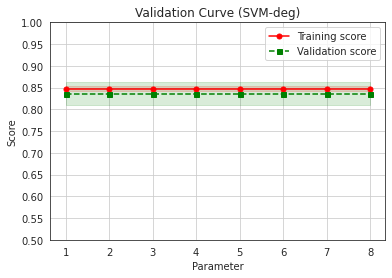

In [44]:
plot_validation_curve(estimator=SVC(random_state=0), title='Validation Curve (SVM-deg)', X=X_scaled, y=y, param_name='degree', param_range=[i for i in range(1, 9)],
                      cv=cv_split, xscale='linear')

# So 'degree' value doesn't matter.

Max Train Score: 0.85 	 Max Test Score: 0.84


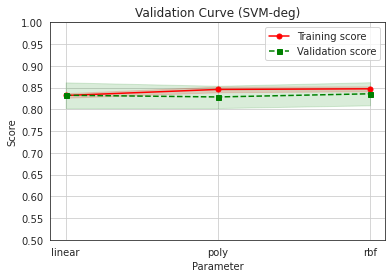

In [45]:
plot_validation_curve(estimator=SVC(random_state=0), title='Validation Curve (SVM-deg)', X=X_scaled, y=y, param_name='kernel', param_range=['linear', 'poly', 'rbf'],
                      cv=cv_split)

# So 'rbf' seems better.

Max Train Score: 0.79 	 Max Test Score: 0.79


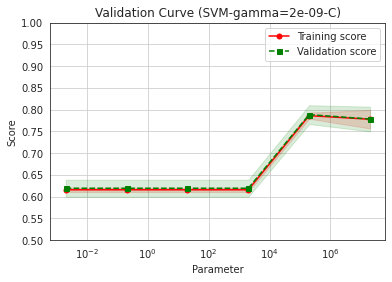

Max Train Score: 0.83 	 Max Test Score: 0.83


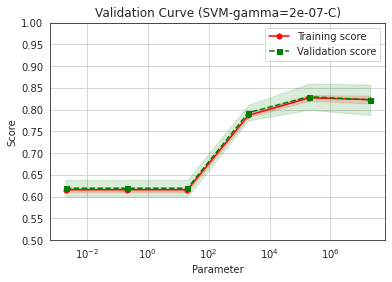

Max Train Score: 0.83 	 Max Test Score: 0.84


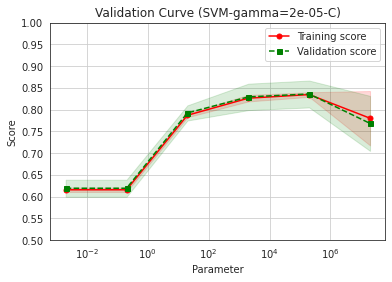

Max Train Score: 0.86 	 Max Test Score: 0.83


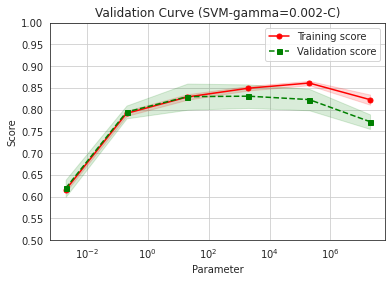

Max Train Score: 0.89 	 Max Test Score: 0.83


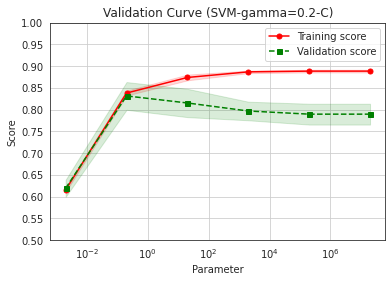

In [46]:
for gamma in [2e-9, 2e-7, 2e-5, 2e-3, 2e-1]:
    plot_validation_curve(estimator=SVC(random_state=0, gamma=gamma, kernel='rbf'), title=f'Validation Curve (SVM-gamma={gamma}-C)', X=X_scaled, y=y, param_name='C',
                          param_range=[2e-3, 2e-1, 2e1, 2e3, 2e5, 2e7], cv=cv_split, xscale='log')

# We'll check both 'gamma = 2e-5', 'C = '2e5' and 'gamma = 2e-3', 'C = 2e3'.

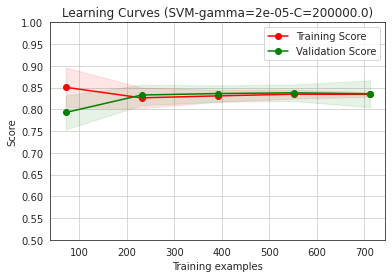

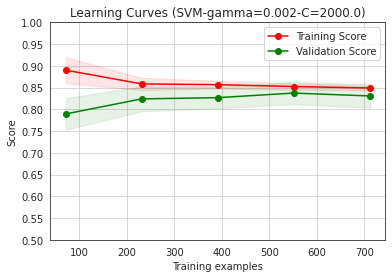

In [47]:
for C, gamma in [(2e5, 2e-5), (2e3, 2e-3)]:
    plot_learning_curve(SVC(random_state=0, C=C, gamma=gamma, kernel='rbf'), f'Learning Curves (SVM-gamma={gamma}-C={C})', X_scaled, y, cv=cv_split)
    
# 'gamma = 2e-5', 'C = '2e5' seems the best.

# Polynomials and Univariate Statistics

In [48]:
poly = PolynomialFeatures(degree=2)
X_scaled_poly = pd.DataFrame(poly.fit_transform(X_scaled))
X_test_scaled_poly = pd.DataFrame(poly.transform(X_test_scaled))

poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5',
       'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x1^2',
       'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8',
       'x1 x9', 'x1 x10', 'x1 x11', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5',
       'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10',
       'x3 x11', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9',
       'x4 x10', 'x4 x11', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9',
       'x5 x10', 'x5 x11', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10',
       'x6 x11', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x8^2',
       'x8 x9', 'x8 x10', 'x8 x11', 'x9^2', 'x9 x10', 'x9 x11', 'x10^2',
       'x10 x11', 'x11^2'], dtype=object)

In [49]:
# Chi-squared test isn't compatible with negative data.

for col in X_scaled_poly.columns:
    minimum = X_scaled_poly[col].min()
    if minimum < 0:
        X_scaled_poly[col] += abs(minimum)

In [50]:
svc = SVC(random_state=0, C=2e5, gamma=2e-5, kernel='rbf')
cv_results_scaled = cross_validate(svc, X_scaled, y, scoring='accuracy', cv=cv_split, n_jobs=-1)
print('CV accuracy (original): %.3f +/- %.3f' % (cv_results_scaled['test_score'].mean(), cv_results_scaled['test_score'].std()))
highest_score = cv_results_scaled['test_score'].mean()

k_features_highest_score = 0
for i in range(1, X_test_scaled_poly.shape[1] + 1):
    select = SelectKBest(score_func=chi2, k=i)
    X_scaled_poly_selected = select.fit_transform(X_scaled_poly, y)

    cv_results_scaled = cross_validate(svc, X_scaled_poly_selected, y, scoring='accuracy', cv=cv_split, n_jobs=-1)
    print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, cv_results_scaled['test_score'].mean(), cv_results_scaled['test_score'].std()))
    
    if cv_results_scaled['test_score'].mean() > highest_score:
        highest_score = cv_results_scaled['test_score'].mean()
        std = cv_results_scaled['test_score'].std()
        k_features_highest_score = i
    elif cv_results_scaled['test_score'].mean() == highest_score:
        if cv_results_scaled['test_score'].std() < std:
            std = cv_results_scaled['test_score'].std()
            k_features_highest_score = i
        
print('Number of features when highest score: %i' % k_features_highest_score)

CV accuracy (original): 0.836 +/- 0.031
CV accuracy (number of features = 1): 0.640 +/- 0.021
CV accuracy (number of features = 2): 0.715 +/- 0.030
CV accuracy (number of features = 3): 0.715 +/- 0.030
CV accuracy (number of features = 4): 0.778 +/- 0.030
CV accuracy (number of features = 5): 0.777 +/- 0.030
CV accuracy (number of features = 6): 0.777 +/- 0.030
CV accuracy (number of features = 7): 0.779 +/- 0.031
CV accuracy (number of features = 8): 0.815 +/- 0.029
CV accuracy (number of features = 9): 0.814 +/- 0.029
CV accuracy (number of features = 10): 0.815 +/- 0.029
CV accuracy (number of features = 11): 0.816 +/- 0.029
CV accuracy (number of features = 12): 0.820 +/- 0.027
CV accuracy (number of features = 13): 0.822 +/- 0.027
CV accuracy (number of features = 14): 0.825 +/- 0.030
CV accuracy (number of features = 15): 0.823 +/- 0.027
CV accuracy (number of features = 16): 0.821 +/- 0.031
CV accuracy (number of features = 17): 0.822 +/- 0.027
CV accuracy (number of features = 

In [51]:
svc = SVC(random_state=0, C=2e5, gamma=2e-5, kernel='rbf')
svc.fit(X_scaled, y)
y_pred = svc.predict(X_scaled)
accuracy_score(y, y_pred)

0.8361391694725028

# Combining Current Models to Create a Super Model

<AxesSubplot:>

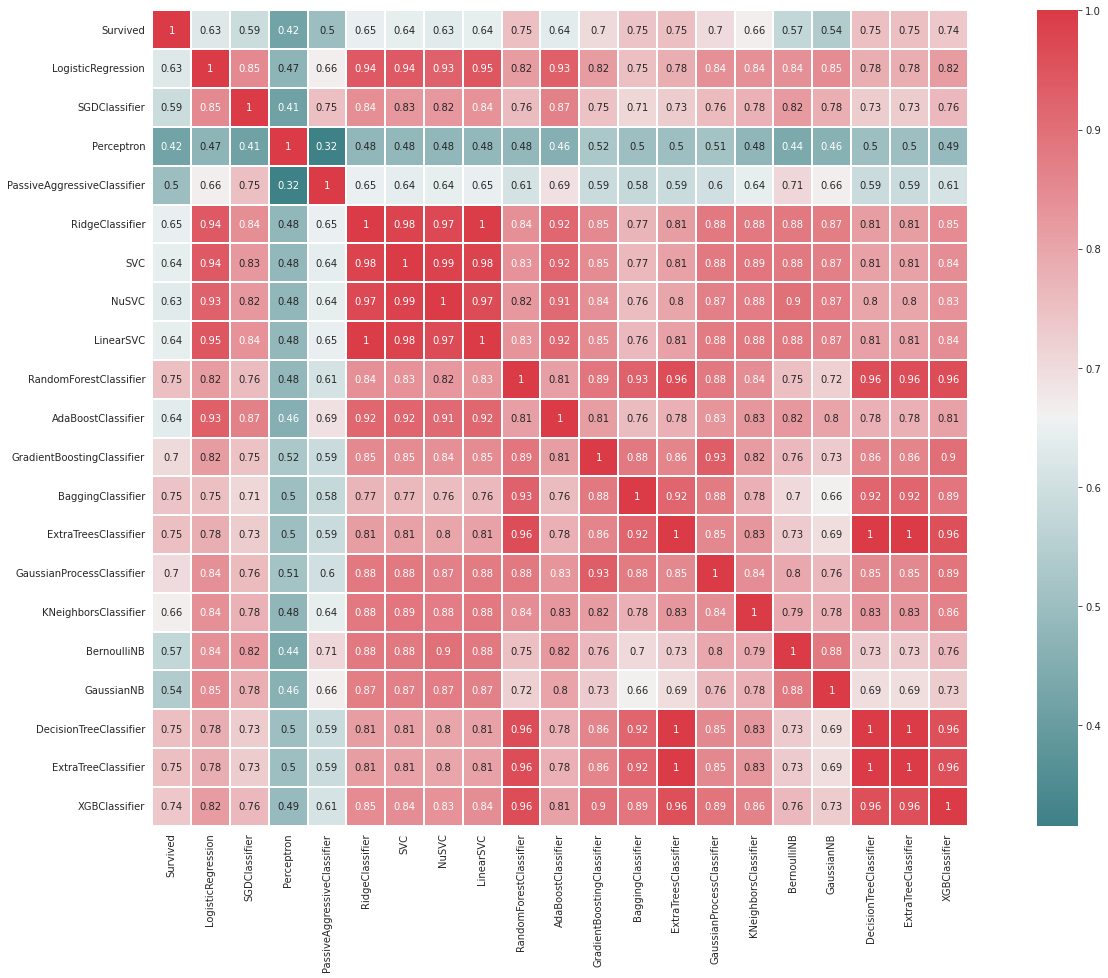

In [52]:
plt.figure(figsize=(25, 15))
sns.heatmap(predictions.corr(), cmap=sns.diverging_palette(200, 10, as_cmap=True), square=True, annot=True, linewidths=0.1, linecolor='white')

In [53]:
# We remove models without attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model

vote_estimators = [('ada', AdaBoostClassifier()), ('bag', BaggingClassifier()), ('bnb', BernoulliNB()), ('dtc', DecisionTreeClassifier()), ('gnb', GaussianNB()),
                   ('gpc', GaussianProcessClassifier()), ('gbc', GradientBoostingClassifier()), ('knn', KNeighborsClassifier()), ('lr', LogisticRegression()),
                   ('svc', SVC(probability=True)), ('nsvc', NuSVC(probability=True)), ('rfc', RandomForestClassifier()),
                   ('sgd', SGDClassifier(loss='modified_huber')), ('xgb', XGBClassifier())]

vote_hard = VotingClassifier(vote_estimators, voting='hard', n_jobs=-1)
vote_hard_cv = cross_validate(vote_hard, X, y, scoring='accuracy', cv=cv_split, n_jobs=-1, error_score='raise')
print('Hard Voting Test Accuracy Mean: {}'.format(vote_hard_cv['test_score'].mean()))

vote_soft = VotingClassifier(vote_estimators, voting='soft', n_jobs=-1)
vote_soft_cv = cross_validate(vote_soft, X, y, scoring='accuracy', cv=cv_split, n_jobs=-1, error_score='raise')
print('Soft Voting Test Accuracy Mean: {}'.format(vote_soft_cv['test_score'].mean()))

Hard Voting Test Accuracy Mean: 0.829608938547486
Soft Voting Test Accuracy Mean: 0.8318435754189946


# Submission

In [54]:
vote_hard.fit(X, y)
y_pred = vote_hard.predict(X_test)

output = pd.DataFrame({
        "PassengerId": oh_test_df["PassengerId"],
        "Survived": y_pred
    })
output.to_csv('submission.csv', index=False)
print('Done!')

Done!
